# Gradient Descent

## Introduction aux données

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pga = pd.read_csv('pga.csv')

# Normaliser les données
pga.distance = (pga.distance - pga.distance.mean())/pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean())/pga.accuracy.std()
print(pga.head())

           player  distance  accuracy
0  Aaron Baddeley  0.410392 -2.281303
1     Adam Hadwin -0.224372  0.702789
2      Adam Scott  2.293166 -0.231465
3      Alex Cejka -0.751549  0.377574
4      Alex Prugh  0.528738  0.032649


Text(0, 0.5, 'précision normalisée')

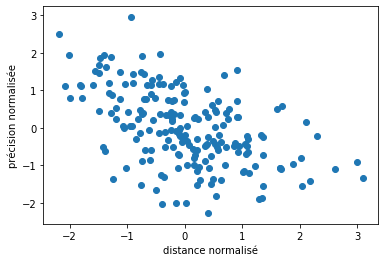

In [10]:
plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('distance normalisé')
plt.ylabel('précision normalisée')

# Modèle linéaire

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()

lr.fit(pga.distance[:,np.newaxis], pga['accuracy'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
theta1 = lr.coef_[0]
theta1

-0.5204230756443441

In [22]:
print(theta1)

-0.5204230756443441


# Introduction à la fonction Cost

In [59]:
def cost(theta0, theta1, x, y):
    # initialiser le coût
    J=0
    # le nombre d'observations
    m = len(x)
    # boucle sur chaque observation
    for i in range(m):
        # calculer h
        h = theta1 * x[i] + theta0
        # ajouter à la valeur de coût J
        J += (h - y[i])**2
    # coût moyen et normalisé
    J /= (2*m)
    return(J)

In [60]:
#exemple
print(cost(0,1,pga.distance,pga.accuracy))

1.5125452358741671


In [61]:
theta1s = np.linspace(-3,2,100)
theta0 = 100



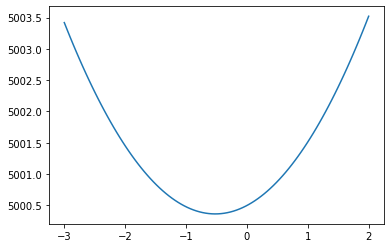

In [68]:
import matplotlib.pyplot as plt

cost_values = []
for i in theta1s:
    cost_elements = cost(theta0,i,pga.distance, pga.accuracy)
    cost_values.append(cost_elements)

plt.plot(theta1s, cost_values )

# La fonction Cost (suite)

In [106]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#Exemple de graphique 4D en utilisant Matplotlib
# Créer des variables x et y
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# Nous devons créer des variables pour représenter chaque paire de points x et y possibles
# Par exemple (-10,10), (-10,-9.8),...,(0,0),....,(10,9.8),(10,10)
# x et y ont besoin d'être transformé en matrices 100x100 pour réprésenter leurs coordonnées
# np.meshgrid va construire une matrice de coordonnées de x et de y
X, Y = np.meshgrid(x,y)
print(X[:5,:5],"\n",Y[:5,:5])

[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]] 
 [[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]


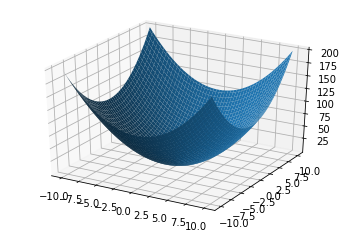

In [107]:
# Calculer une parabole 3D 
Z = X**2 + Y**2

# Ouvrir une figure pour y placer le graphique
fig = plt.figure()
# initialiser un graphique 3D
ax = fig.gca(projection='3d')
#Tracer la surface
ax.plot_surface(X=X,Y=Y,Z=Z)


In [130]:
theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
COST = np.empty(shape=(100,100))

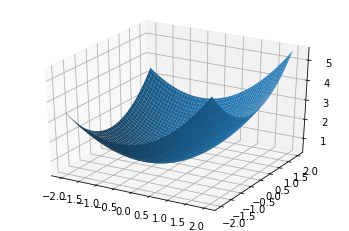

In [131]:
# On utilise meshgrid pour les paramètres
T0S, T1S = np.meshgrid(theta0s, theta1s)

# Pour chaque combinaison de paramètres oon calcule le coût
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)

#Graphique 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S, Z=COST)
plt.show()

# Fonctions Cost - pentes

In [143]:
def partial_cost_theta1(theta0,theta1,x,y):
    h = theta0 + theta1*x 
    diff = (h-y) * x
    partial = diff.sum()/(x.shape[0])
    return partial

partial1 = partial_cost_theta1(0,5,pga.distance,pga.accuracy)
print("Dérivée partielle par rapport à theta1 =", partial1)

Dérivée partielle par rapport à theta1 = 5.491819847273131


In [146]:
def partial_cost_theta0(theta0,theta1,x,y):
    h = theta0 + theta1*x 
    diff = (h-y) 
    partial = diff.sum()/(x.shape[0])
    return partial

partial0 = partial_cost_theta0(1,1,pga.distance,pga.accuracy)
print("Dérivée partielle par rapport à theta 0 =", partial0)

Dérivée partielle par rapport à theta 0 = 1.0000000000000155


# Algorithme Gradient Descent

In [147]:
# updates : stocke nos données de convergence pour une visualisation ultérieure
# theta0 et theta1: valeur initiale pente et de l'interception
# alpha = 0.01 : bonne valeur de départ à augmenter ou diminuer 
# max_epochs : limiter le nombre d'itérations 
# c : maintenir le cout initial en utilisant les paramètres initiaux

In [156]:
# x est notre vecteur de caractéristiques -- distance
# y est notre variable cible -- accuracy
# alpha est le taux d'apprentissage
# theta0 est la valeur initiale de theta0
# theta1 est la valeur initiale de theta1

def gradient_descent(x,y,alpha=0.01,theta0=0,theta1=0):
    max_epochs = 1000 # nombre maximum d'itérations
    counter = 0 # Initialise un décompte
    c = cost(theta1, theta0, pga.distance, pga.accuracy) # valeur de coût intial
    costs = [c] # stockons chaque mise à jour
    
    # Fixer un seuil de convergence pour rechercher où la fonction cost est minimisé
    # Lorsque la différence entre le coût précédent et actuel
    # est inférieure à cette valeur(10), on dira que les paramètres ont convergé
    convergence_thres = 0.000001 # on le fixe à cette valeur
    cprev = c + 10
    theta0s = [theta0]
    theta1s = [theta1]
    
    # Lorsque les coûts convergent ou que nous arrivons à un grand nombre d'itérations
    # nous cessons de mettre à jour
    while (np.abs(cprev - c) > convergence_thres) and (counter< max_epochs):
        cprev = c
        # Alpha fois la dérivée partielle est notre mise à jour
        update0 = alpha*partial_cost_theta0(theta0,theta1,x,y)
        update1 = alpha*partial_cost_theta1(theta0,theta1,x,y)
        
        #Mettre à jour theta0 et theta1 au même moment
        #Nous voulons calculer les pentes avec le même ensemble de paramètres
        # donc on met à jour après trouvé les dérivées partielles
        theta0 -= update0
        theta1 -= update1
        
        #stocker les thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        #Calculer le nouveau coût 
        c = cost(theta0, theta1, pga.distance, pga.accuracy)
        
        #Stocker les mises à jour
        costs.append(c)
        counter += 1 #décompte d'itérations
        
    # retourne un dictionnaire contenant les valeurs de theta et de coût
    return {'theta0' : theta0, 'theta1' : theta1, 'costs':costs}
        

In [166]:
print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])

Theta1 = -0.5104943321267972


In [179]:
taille = len(gradient_descent(pga.distance, pga.accuracy))
costs = gradient_descent(pga.distance, pga.accuracy)['costs']

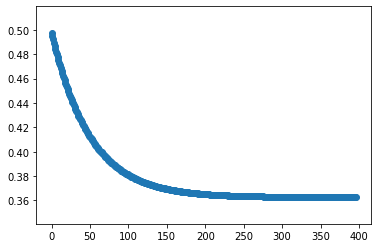

In [185]:
plt.scatter(range(len(costs)), costs)

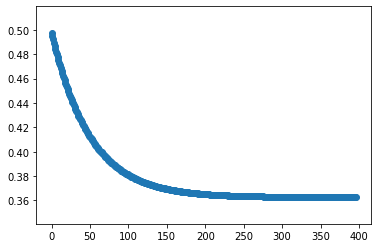

In [175]:
# le prof
descent = gradient_descent(pga.distance, pga.accuracy, alpha=0.01)
plt.scatter(range(len(descent['costs'])), descent['costs'])
plt.show()

In [191]:
gradient_descent(pga.distance, pga.accuracy)

{'theta0': 4.633812044494687e-15,
 'theta1': -0.5104943321267972,
 'costs': [0.49740932642487046,
  0.4947422508772823,
  0.4921279765088536,
  0.4895654579931702,
  0.4870536706985686,
  0.4845916102784361,
  0.48217829226961745,
  0.4798127516987756,
  0.4774940426965422,
  0.47522123811931,
  0.4729934291785103,
  0.4708097250772318,
  0.4686692526540321,
  0.4665711560338003,
  0.4645145962855322,
  0.46249875108688415,
  0.4605228143953606,
  0.4585859961260172,
  0.4566875218355436,
  0.45482663241259785,
  0.45300258377427255,
  0.45121464656857524,
  0.4494621058827893,
  0.4477442609576159,
  0.44606042490697345,
  0.44440992444334393,
  0.4427920996085556,
  0.44120630350989626,
  0.43965190206145305,
  0.4381282737305699,
  0.43663480928932336,
  0.43517091157092574,
  0.43373599523094064,
  0.4323294865132361,
  0.4309508230205608,
  0.4295994534896719,
  0.4282748375709097,
  0.42697644561213494,
  0.42570375844694924,
  0.42445626718709983,
  0.42323347301900366,
  0.4220